# Aula 49

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [104]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

In [105]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)

In [106]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0)

In [107]:
sift = cv2.xfeatures2d.SIFT_create()

In [108]:
kp1, des1 = sift.detectAndCompute(reeses, None)
kp2, des2 = sift.detectAndCompute(cereals, None)

In [117]:
## FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)

In [118]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [119]:
matches = flann.knnMatch(des1, des2, k=2)

In [120]:
matchesMask = [[0,0] for i in range(len(matches))]

In [123]:
for i,(match1, match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0] 

In [126]:
draw_params = dict(matchColor=(0,255,0), 
                   singlePointColor=(255,0,0),
                   matchesMask=matchesMask, 
                   flags=0)

In [131]:
flann = cv2.drawMatchesKnn(reeses, kp1, cereals, kp2, matches, None, **draw_params)

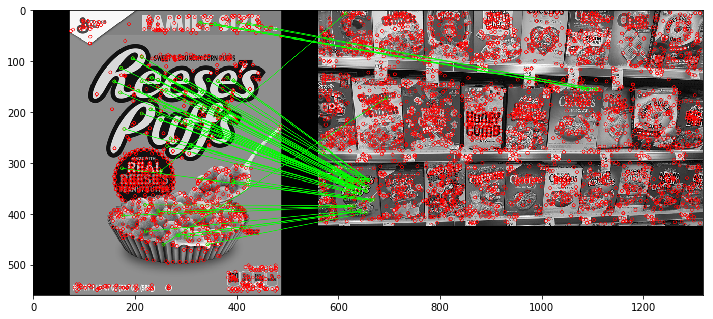

In [132]:
display(flann)